<a href="https://colab.research.google.com/github/bunkorner/VR_Assignment3/blob/main/Assignment_3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3b:

Dataset used: PASCAL VOC-2005<br>Check-out the Dataset [here](http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1)

The dataset has four classes [ person, bicycle, cars, bike ]<br>The size of dataset is ~1.2k RGB photos in total

Model used: AlexNet

In [1]:
import torch
from torchvision import models, datasets
import torchvision
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
from google.colab import drive

All the necessary imports

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
print(os.listdir("/content/gdrive/MyDrive/CV/Assignment_3/P_VOC2005/"))

['Train', 'Test']


In [4]:
print(os.listdir("/content/gdrive/MyDrive/CV/Assignment_3/P_VOC2005/Train"))

['bike', 'person', 'cars', 'bicycle']


In [5]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [6]:
data_dir = '/content/gdrive/MyDrive/CV/Assignment_3/P_VOC2005/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), preprocess) for x in ['Train', 'Test']}

In [7]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1, shuffle=True, num_workers=0) for x in ['Train', 'Test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Train', 'Test']}

class_names = image_datasets['Train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)

['bicycle', 'bike', 'cars', 'person']


In [8]:
dataset_sizes

{'Train': 944, 'Test': 229}

In [9]:
image_datasets['Train'][0][0].shape

torch.Size([3, 224, 224])

In [10]:
def showData(data):
  loader = torch.utils.data.DataLoader(data, batch_size=6, shuffle=True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow=3)
  plt.figure(figsize=(11,11))
  plt.imshow(np.transpose(grid, (1,2,0)))
  print('labels: ', labels)

labels:  tensor([0, 1, 2, 0, 0, 2])


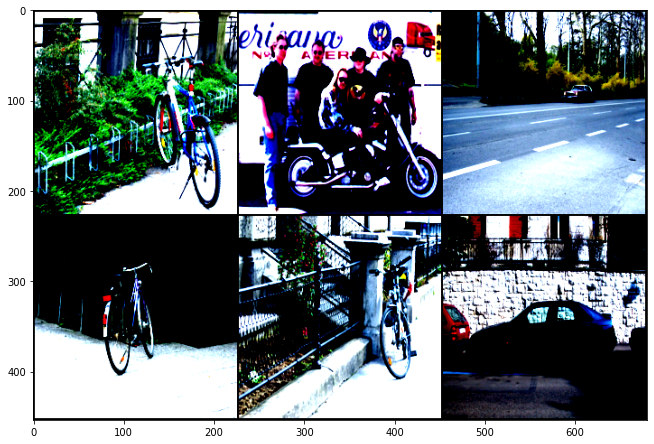

In [11]:
showData(image_datasets['Train'])

In [12]:
model = models.vgg16(pretrained=True)
feature_extractor = torch.nn.Sequential(*(list(model.children())[:-1]))
print(feature_extractor)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [13]:
feature_extractor[1] = torch.nn.Flatten()

In [14]:
feature_extractor

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
for param in feature_extractor.parameters():
    param.requires_grad = False

In [16]:
from torchsummary import summary
summary(feature_extractor, (3, 224, 224), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

feature_extractor.to(device)

cuda:0


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
train_features=[]
y_train=[]
for images,label in dataloaders['Train']:
  images, label = images.cuda(), label.cuda()

  out = feature_extractor(images)
  train_features.append(out.cpu().detach().numpy())
  y_train.append(label.cpu().detach().numpy())

In [19]:
len(y_train)

944

In [20]:
train_features = np.array(train_features)

In [21]:
labels = np.array(y_train)

In [22]:
x_train = train_features.squeeze()

In [23]:
x_train.shape

(944, 25088)

In [24]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [25]:
RF_model.fit(x_train, y_train)

<ipython-input-25-09a456672ee3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [26]:
test_features=[]
y_test=[]
for images,label in dataloaders['Test']:
  images, label = images.cuda(), label.cuda()

  out = feature_extractor(images)
  test_features.append(out.cpu().detach().numpy())
  y_test.append(label.cpu().detach().numpy())

In [27]:
test_features = np.array(test_features)
y_test = np.array(y_test)

In [28]:
x_test = test_features.squeeze()

In [29]:
x_test.shape

(229, 25088)

In [30]:
prediction_RF = RF_model.predict(x_test)

In [ ]:
prediction_RF.reshape(y_test.shape[0], y_test.shape[1])

In [32]:
y_test.shape

(229, 1)

In [ ]:
prediction_RF

In [ ]:
y_test

In [35]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  0.7816593886462883


Repeating for Bike vs Horse Classification

In [38]:
print(os.listdir("/content/gdrive/MyDrive/CV/Assignment_3/Bike_Horse/"))

['Test', 'Train']


In [39]:
print(os.listdir("/content/gdrive/MyDrive/CV/Assignment_3/Bike_Horse/Train/"))

['Bikes', 'Horses']


In [40]:
data_dir = '/content/gdrive/MyDrive/CV/Assignment_3/Bike_Horse/'
bike_horse_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), preprocess) for x in ['Train', 'Test']}

In [41]:
bhdataloaders = {x: torch.utils.data.DataLoader(bike_horse_datasets[x], batch_size=1, shuffle=True, num_workers=0) for x in ['Train', 'Test']}
bhdataset_sizes = {x: len(bike_horse_datasets[x]) for x in ['Train', 'Test']}

bhclass_names = bike_horse_datasets['Train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(bhclass_names)

['Bikes', 'Horses']


In [42]:
bhdataset_sizes

{'Train': 152, 'Test': 36}

In [43]:
bike_horse_datasets['Train'][0][0].shape

torch.Size([3, 224, 224])

labels:  tensor([1, 0, 0, 1, 0, 1])


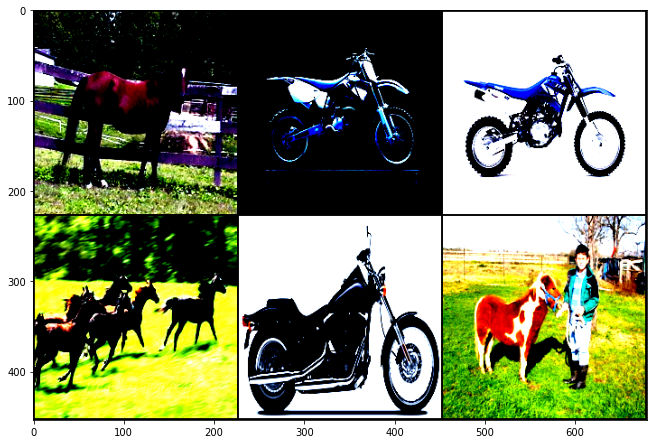

In [44]:
showData(bike_horse_datasets['Train'])

In [45]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

feature_extractor.to(device)

cuda:0


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [46]:
train_bh_features=[]
y_train_bh=[]
for images,label in bhdataloaders['Train']:
  images, label = images.cuda(), label.cuda()

  out = feature_extractor(images)
  train_bh_features.append(out.cpu().detach().numpy())
  y_train_bh.append(label.cpu().detach().numpy())

In [47]:
len(y_train_bh)

152

In [48]:
train_bh_features = np.array(train_bh_features)
y_train_bh = np.array(y_train_bh)

In [49]:
x_train_bh = train_bh_features.squeeze()

In [50]:
x_train_bh.shape

(152, 25088)

In [51]:
from sklearn.ensemble import RandomForestClassifier
RF_model_bh = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [52]:
RF_model_bh.fit(x_train_bh, y_train_bh)

<ipython-input-52-71f7a33a814e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_bh.fit(x_train_bh, y_train_bh)


RandomForestClassifier(n_estimators=50, random_state=42)

In [57]:
test_bh_features=[]
y_test_bh=[]
for images,label in bhdataloaders['Test']:
  images, label = images.cuda(), label.cuda()

  out = feature_extractor(images)
  test_bh_features.append(out.cpu().detach().numpy())
  y_test_bh.append(label.cpu().detach().numpy())

In [58]:
test_bh_features = np.array(test_bh_features)
y_test_bh = np.array(y_test_bh)

In [59]:
x_test_bh = test_bh_features.squeeze()

In [60]:
x_test_bh.shape

(36, 25088)

In [61]:
prediction_RF_bh = RF_model_bh.predict(x_test_bh)

In [62]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_bh, prediction_RF_bh))

Accuracy =  1.0
